In [32]:
from astropy.io import fits,ascii
from matplotlib import table
from numpy import *
import matplotlib.pyplot as plt
from astropy.table import Table
from roman import toRoman
from scipy.interpolate import interp2d,interp1d
from scipy.optimize import fsolve
from roman import toRoman

In [33]:
plt.style.use('Files_n_figures/my_style.mpl')

hdu=fits.open('Data/component_II_nH_Z_const_T_col_density_param.fits')
data=Table(hdu[1].data)

log_nH=data['log_nH']
log_Z=data['log_Z']
col_den_OVI=log10(data['O+5'])

N_OVI=14.26

ions=['Si+', 'Si+2','C+', 'C+2']
ions_label=[f'Si {toRoman(2)}', f'Si {toRoman(3)}',f'C {toRoman(2)}', f'C {toRoman(3)}']

upper_col_den=[12.4,12.3,13.3,'NA']
upper_lim=dict(zip(ions,upper_col_den))

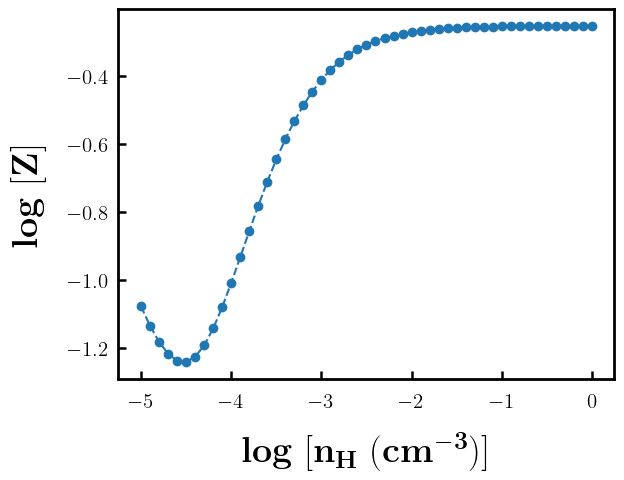

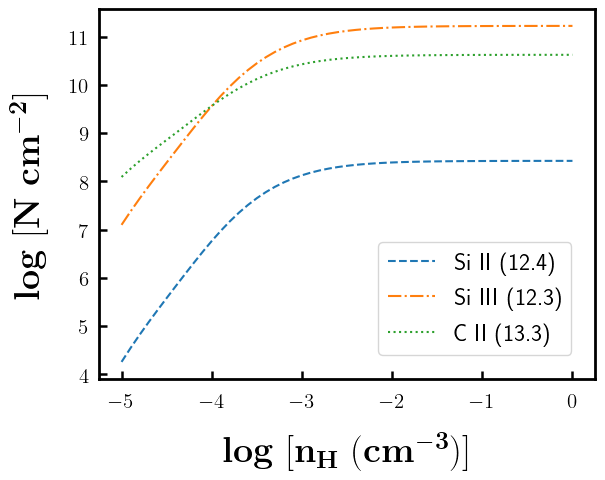

In [34]:
def Z_solve(nH):

    mask=log_nH==nH

    log_Z_mask=log_Z[mask]
    col_den_OVI_mask=col_den_OVI[mask]

    f=interp1d(log_Z_mask,col_den_OVI_mask,kind='cubic')

    def func(x):
        return f(x)-N_OVI

    Z=fsolve(func,-1)
    col_den_ions_dict={}

    for i in ions:
        col_den_ion=log10(data[i])[mask]
        f_interp=interp1d(log_Z_mask,col_den_ion,kind='cubic')
        col_den_ions_dict[i]=f_interp(Z)

    return Z, col_den_ions_dict

    
nH=arange(-5,0.1,0.1)
Z=[]
# col_den_ions_dict={'Si+':[],'Si+2':[],'C+':[],'C+2':[]}

col_den_ions_dict={'Si+':[],'Si+2':[],'C+':[],'C+2':[]}
ions_label=[f'Si {toRoman(2)}', f'Si {toRoman(3)}',f'C {toRoman(2)}', f'C {toRoman(3)}']
ls=['dashed','dashdot','dotted',(0, (3, 5, 1, 5, 1, 5)),'solid']


for n in nH:
    n=round(n,2)
    z,col_den_ions=Z_solve(n)
    Z.append(z)

    for i in ions:
        col_den_ions_dict[i].append(col_den_ions[i])


plt.figure()
plt.plot(nH,Z,ls='--')
plt.scatter(nH,Z)
plt.ylabel(r'$\mathbf{log \ [Z]}$',labelpad=15)
plt.xlabel(r'$\mathbf{log \ [n_H \ ({cm}^{-3})]}$',labelpad=15)

plt.figure()
    
for i,ion in enumerate(ions[:-1]):
    plt.plot(nH,col_den_ions_dict[ion],ls=ls[i],label=f'{ions_label[i]} ({upper_lim[ion]})')

plt.legend()
plt.ylabel(r'$\mathbf{log \ [N \ {cm}^{-2}]}$',labelpad=15)
plt.xlabel(r'$\mathbf{log \ [n_H \ ({cm}^{-3})]}$',labelpad=15)

plt.show()
